<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Operaciones_Anual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Operaciones_Anual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes

## Andres Mauricio Martinez Celis
## Jairo Vladimir Chaparro Rodriguez
## Danilo Andres Alfonso
## Oscar Duvan Giraldo Romero
  
**Contexto:** Comercial Química, fundada en 2001, provee materias primas de calidad a la industria farmacéutica y de concentrados. Actualmente, busca mejorar su gestión de inventario mediante un dashboard que permita monitorizar, alertar y optimizar el abastecimiento, además de realizar predicciones anuales.

**Dataset:** El informe presenta datos de operación para los años 2020, 2021, 2022 y 2023. Se incluyen detalles sobre ventas por producto y mes, compras mensuales y cálculos de inventario. Estos datos cuantitativos son esenciales para calcular el índice de rotación y son de interés para los stakeholders.

Ultima actualización: August, 2023

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [3]:
# Loading the CSV file as dataframe
Operación_df = pd.read_csv("./data/Dataset_Operacion_Anual.csv")

In [4]:
# Showing dataframe dimensions
Operación_df.shape

(30100, 5)

In [5]:
# Showing column types
Operación_df.dtypes

DESCRIPCIÓN DEL ARTICULO    object
CANTIDAD                     int64
MES                         object
TIPO                        object
AÑO                          int64
dtype: object

In [6]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
Operación_df.sample(10) # Showing a sample of n rows

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
18463,TOLTRAZURIL MICRONIZADO,0,JUNIO,COMPRAS,2021
23209,VITAMINA B6 HCL (PIRIDOXINA HCL),25,ABRIL,VENTAS,2020
15356,GLICEROFOSFATO MANGANESO NF12,25,ABRIL,VENTAS,2021
26048,CIPERMETRINA TECNICA,0,JUNIO,COMPRAS,2020
20979,L-LISINA HCL x 5KG,0,JUNIO,INVENTARIO,2021
27387,FOSFORILCOLAMINA,0,DICIEMBRE,COMPRAS,2020
23916,DEXAMETASONA BASE,0,AGOSTO,VENTAS,2020
6654,VITAMINA B6 HCL (PIRIDOXINA HCL),-7475,NOVIEMBRE,INVENTARIO,2023
4742,AMPICILINA TRIHIDRATO POLVO,0,MARZO,INVENTARIO,2023
6817,PANTOTENATO DE CALCIO,-2050,DICIEMBRE,INVENTARIO,2023


## 1. Verify data quality

In [7]:
!pip install pylev

In [9]:
import re
from random import randint
from datetime import datetime
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import pylev

In [11]:
# months dictionary
month_list = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

In [12]:
# Finding values not matching with the dictionary
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

In [13]:
# Finding the number of values for the variable
Operación_df["MES"].nunique()

12

In [14]:
# describing the variable values
Operación_df["MES"].unique()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype=object)

In [17]:
# suppressing empty values
Operación_df["MES"] = Operación_df["MES"].str.replace(r'^\s*$', '', regex=True)
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

## Detecting duplicates on columns

In [20]:
# Detecting duplicates by "DESCRIPCIÓN DEL ARTICULO" column
duplicates_by_product = Operación_df.loc[Operación_df["DESCRIPCIÓN DEL ARTICULO"].duplicated(keep=False)]
duplicates_by_product.shape

(30098, 5)

In [22]:
# Finds duplicate rows based on the specified columns
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]
duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
25794,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25797,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25795,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25798,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25796,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
25799,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
26654,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26657,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26655,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020
26658,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020


In [24]:
# Remove duplicates from the dataset
Operación_df = Operación_df.drop_duplicates(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep='first')

In [25]:
# List of columns you want to consider for finding duplicates
columnas_a_verificar = ['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO']
# Finds duplicate rows based on the specified columns
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]
duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO


# 2. Univariate analysis

## DESCRIPCIÓN DEL ARTICULO

In [27]:
# Showing the number of unique value
# This can be helpful to diagnose duplicity
Operación_df["DESCRIPCIÓN DEL ARTICULO"].nunique()

224

In [28]:
# Showing unique values of DESCRIPCIÓN DEL ARTICULO
Operación_df["DESCRIPCIÓN DEL ARTICULO"].unique()

array(['ACETAMINOFEN (PARACETAMOL)', 'ACIDO ACETIL SALICILICO',
       'ACIDO FOLICO', 'ACIDO SALICILICO',
       'ADENOSIN TRIFOSFATO DISODICO (ATP)', 'ALBENDAZOL MICRONIZADO',
       'ALGINATO DE SODIO', 'AMITRAZ TECNICO',
       'AMOXICILINA TRIHIDRATO COMPACTADA',
       'AMOXICILINA TRIHIDRATO POLVO', 'AMPICILINA SODICA POLVO ESTERIL',
       'AMPICILINA TRIHIDRATO MICRONIZADA', 'AMPICILINA TRIHIDRATO POLVO',
       'AMPROLIO HCL', 'ANTIPIRINA', 'ATROPINA SULFATO', 'AZITROMICINA',
       'BENZOCAINA', 'BETAMETASONA BASE', 'BETAMETASONA SODIO FOSFATO',
       'BIOTINA 2%', 'BOLDENONA UNDECILENATO', 'BROMHEXINA HCL',
       'BUTOXIDO DE PIPERONILO', 'CACODILATO DE SODIO', 'CAFEINA ANHIDRA',
       'CEFAPIRINA BENZATINICA MICRONIZADA ESTERIL',
       'CEFOPERAZONA SODICA ESTERIL', 'CEFPODOXIMA PROXETIL',
       'CEFQUINOMA SULFATO', 'CEFTIOFUR HCL ESTERIL',
       'CEFTIOFUR LIBRE DE ACIDOS', 'CEFTIOFUR SODICO ESTERIL',
       'CIPERMETRINA TECNICA',
       'CIPERMETRINA TECNICA (EST

In [29]:
# Calculating the relative frecuency of DESCRIPCIÓN DEL ARTICULO
Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts(dropna=False, normalize=False) # You can set normalize to False for calculating the absolute frecuency

ACETAMINOFEN (PARACETAMOL)          140
METRONIDAZOL BENZOYL MICRONIZADO    140
MONOETANOLAMINA                     140
MONTELUKAST SODICO                  140
NEOMICINA SULFATO                   140
                                   ... 
SALDOS INICIAL 01-31-2026             3
SALDOS INICIAL 01-31-2024             3
GLICEROFOSFATO MANGANESO NF14         3
GLICEROFOSFATO MANGANESO NF10         1
SALDOS INICIAL 01-31-2020             1
Name: DESCRIPCIÓN DEL ARTICULO, Length: 224, dtype: int64

In [30]:
# Calculating basic statistics of DESCRIPCIÓN DEL ARTICULO
Operación_df["DESCRIPCIÓN DEL ARTICULO"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count                          29680
unique                           224
top       ACETAMINOFEN (PARACETAMOL)
freq                             140
Name: DESCRIPCIÓN DEL ARTICULO, dtype: object

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

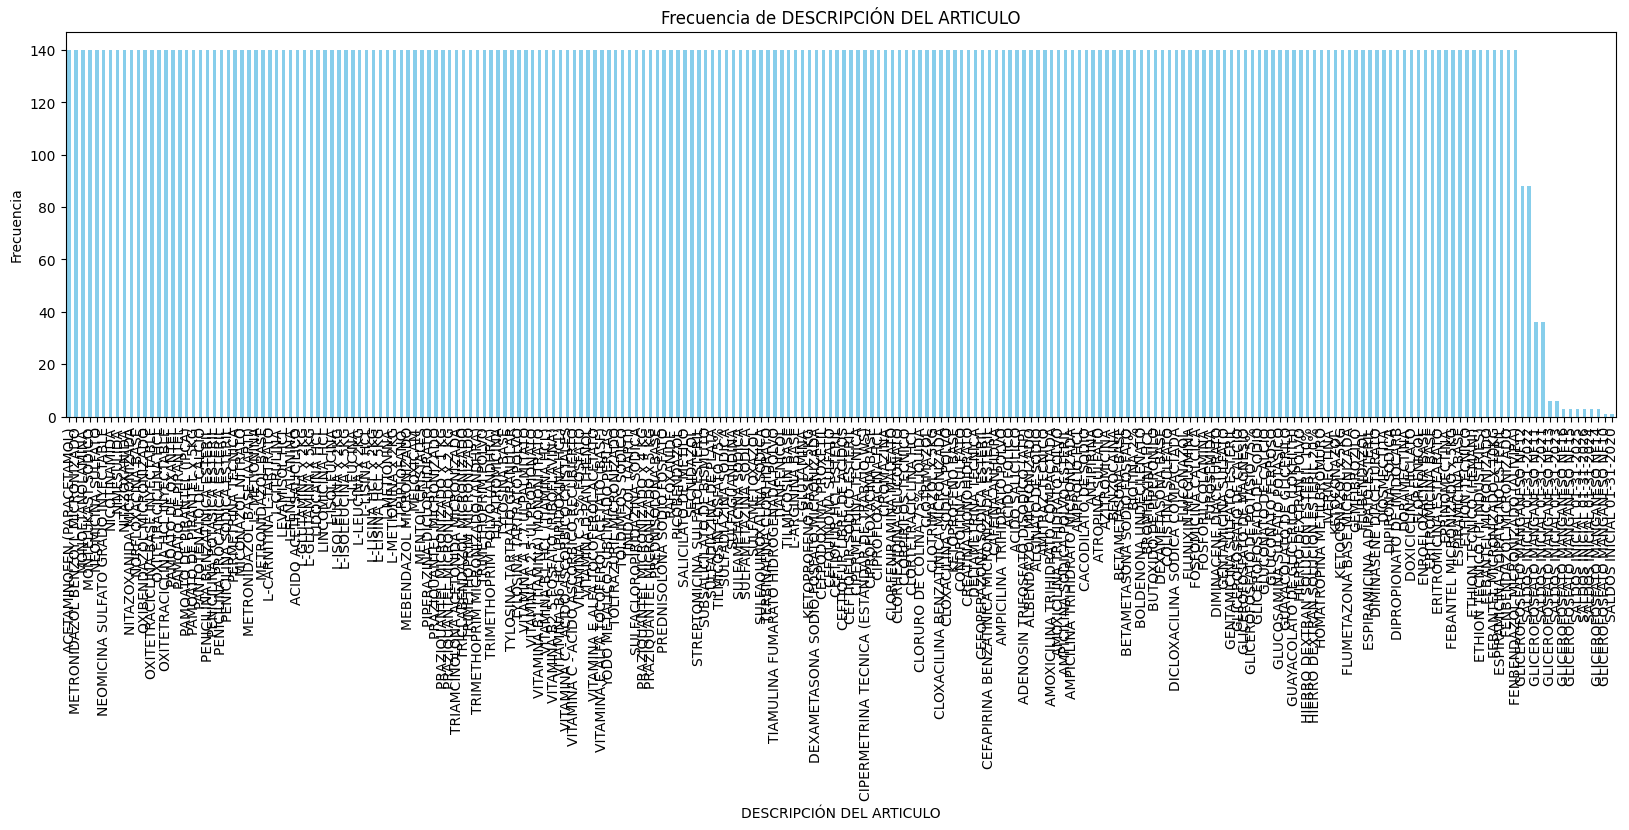

In [31]:
# Frequency graph
conteo_valores = Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts()
plt.figure(figsize=(20, 5))
conteo_valores.plot(kind='bar', color='skyblue')
plt.title("Frecuencia de DESCRIPCIÓN DEL ARTICULO")
plt.xlabel("DESCRIPCIÓN DEL ARTICULO")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles


In [33]:
# find the mode of DESCRIPCIÓN DEL ARTICULO
Operación_df['DESCRIPCIÓN DEL ARTICULO'].mode()

0                    ACETAMINOFEN (PARACETAMOL)
1                       ACIDO ACETIL SALICILICO
2                                  ACIDO FOLICO
3                              ACIDO SALICILICO
4            ADENOSIN TRIFOSFATO DISODICO (ATP)
                         ...                   
205                      VITAMINA C 35% FOSFATO
206                        VITAMINA D-PANTHENOL
207           VITAMINA E ALFA TOCOFEROL ACETATO
208    VITAMINA E ALFA TOCOFEROL ACETATO (BASF)
209              YODO METALICO SUBLIMADO PERLAS
Name: DESCRIPCIÓN DEL ARTICULO, Length: 210, dtype: object

## CANTIDAD

In [35]:
# Showing the number of unique values
# This can be helpful to diagnose duplicity
Operación_df["CANTIDAD"].nunique()

2044

In [36]:
# Showing unique values of CANTIDAD
Operación_df["CANTIDAD"].unique()

array([  2525,    150,      0, ..., -10075,  -3717,  -1070])

In [37]:
# Calculating the relative frecuency of CANTIDAD
Operación_df["CANTIDAD"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

 0        0.607817
 25       0.012129
-1        0.009906
 50       0.009535
 100      0.007345
            ...   
-54075    0.000034
-1790     0.000034
-3990     0.000034
-9575     0.000034
-1070     0.000034
Name: CANTIDAD, Length: 2044, dtype: float64

In [38]:
# Calculating basic statistics of CANTIDAD
Operación_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    29680.000000
mean      -574.098349
std       3633.283020
min     -84750.000000
5%       -3000.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        425.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

In [39]:
# Let's make some calculations for determining an outlier threshold
q1 = Operación_df["CANTIDAD"].quantile(0.25)
q3 = Operación_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

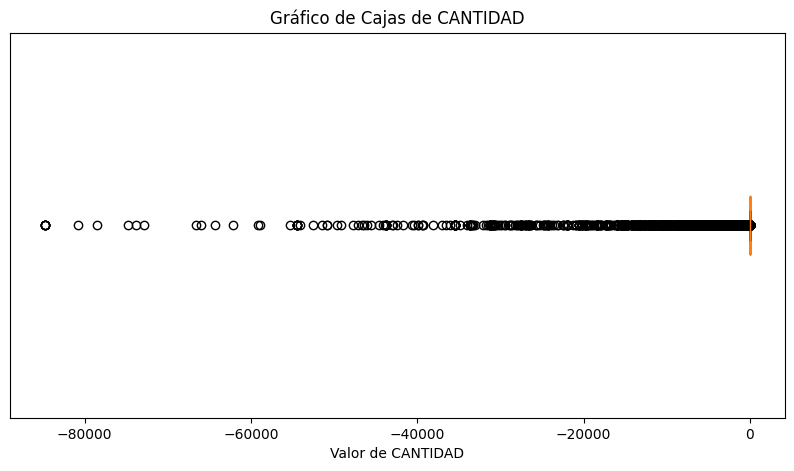

In [42]:
# Box plot for CANTIDAD
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = Operación_df.loc[Operación_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()


In [47]:
# We are going to take the CANTIDAD statistics when TIPO equals COMPRAS
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
compras_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     9328.000000
mean        30.285913
std        328.010241
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

In [48]:
# Let's make some calculations for determining an outlier threshold
q1 = compras_df["CANTIDAD"].quantile(0.25)
q3 = compras_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

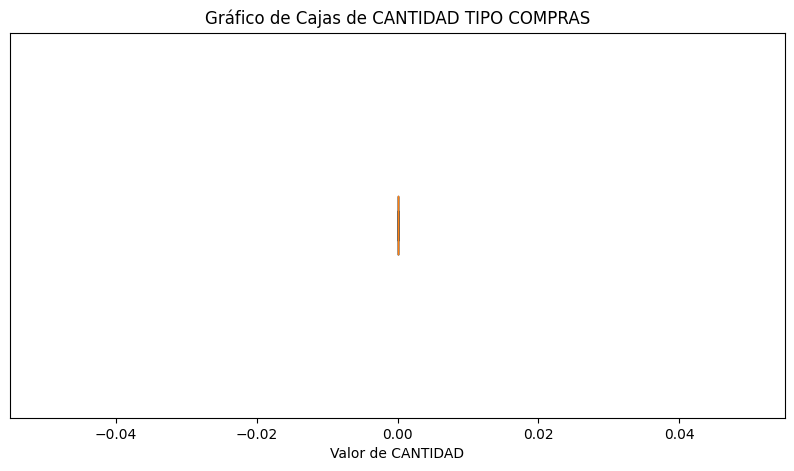

In [51]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = compras_df.loc[compras_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO COMPRAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()


In [53]:
# We are going to take the CANTIDAD statistics when TIPO equals VENTAS
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']
ventas_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    10176.000000
mean       101.767296
std        359.889510
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         27.250000
95%        525.000000
max       7250.000000
Name: CANTIDAD, dtype: float64

In [54]:
# Let's make some calculations for determining an outlier threshold
q1 = ventas_df["CANTIDAD"].quantile(0.25)
q3 = ventas_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

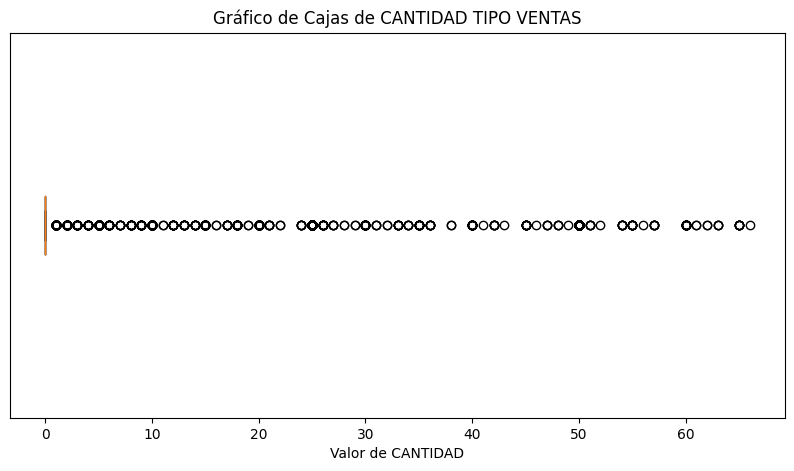

In [56]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = ventas_df.loc[ventas_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO VENTAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()


In [57]:
# We are going to take the CANTIDAD statistics when TIPO equals INVENTARIO
inventario_df = Operación_df[Operación_df['TIPO'] == 'INVENTARIO']
inventario_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    10176.000000
mean     -1803.982901
std       5997.669503
min     -84750.000000
5%       -9481.250000
25%      -1350.000000
50%       -105.000000
75%          0.000000
95%        800.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

In [58]:
# Let's make some calculations for determining an outlier threshold
q1 = inventario_df["CANTIDAD"].quantile(0.25)
q3 = inventario_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

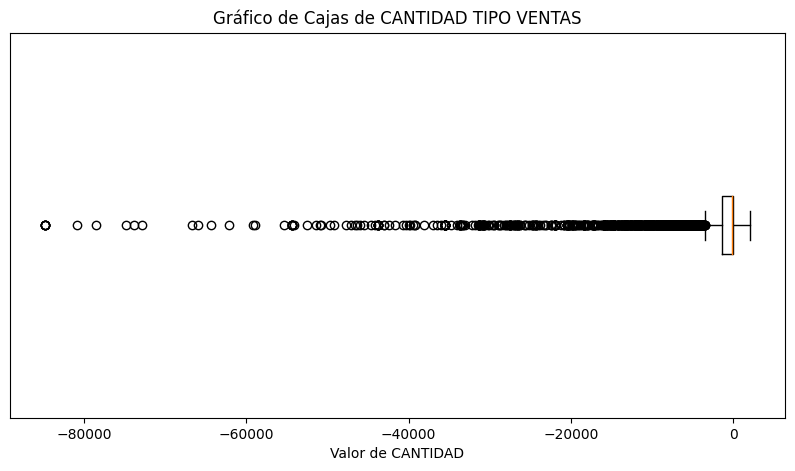

In [59]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = inventario_df.loc[inventario_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO VENTAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

## TIPO


In [60]:
# Showing the number of unique values
# This can be helpful to diagnose duplicity
Operación_df["TIPO"].nunique()

3

In [61]:
# Showing unique values of TIPO
Operación_df["TIPO"].unique()

array(['VENTAS', 'COMPRAS', 'INVENTARIO'], dtype=object)

In [62]:
# Calculating the relative frecuency of TIPO
Operación_df["TIPO"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

VENTAS        0.342857
INVENTARIO    0.342857
COMPRAS       0.314286
Name: TIPO, dtype: float64

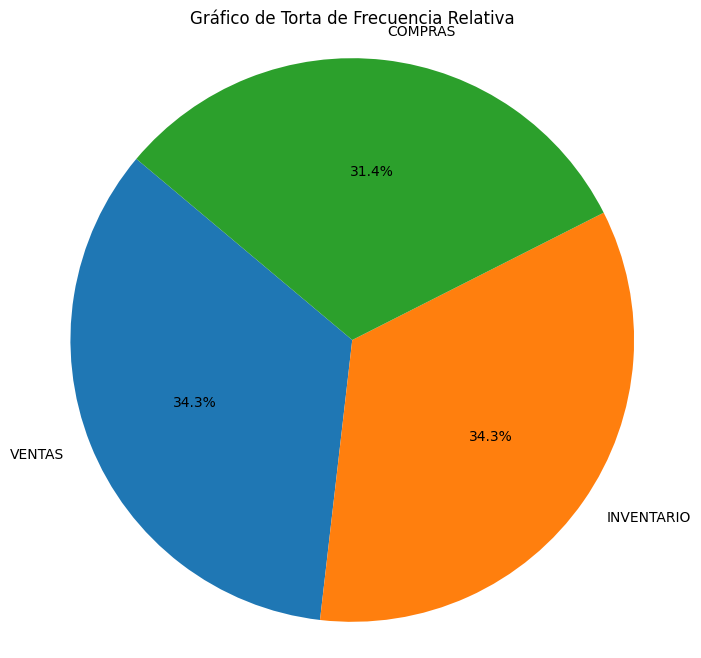

In [64]:
# Create the pie chart
frecuencia_relativa = Operación_df["TIPO"].value_counts(dropna=False, normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de Torta de Frecuencia Relativa")
plt.axis('equal')  # To ensure that the graph is circular

plt.show()

In [65]:
# Find the value of mode fot TIPO
Operación_df["TIPO"].mode()

0    INVENTARIO
1        VENTAS
Name: TIPO, dtype: object

## 2. Bivariate analysis

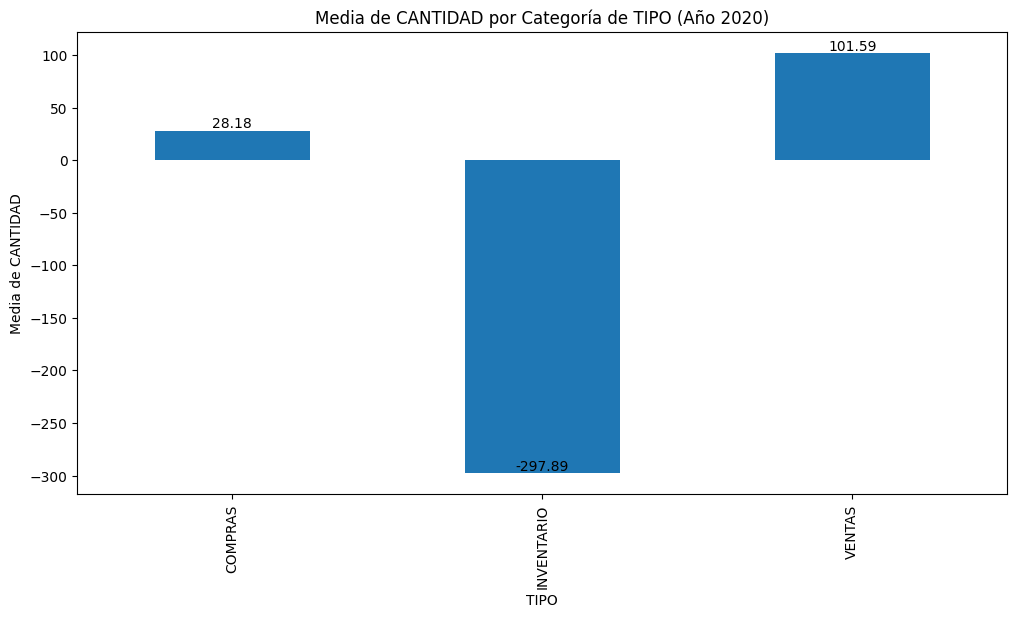

In [67]:
# Filter data for the year 2020
datos_2020 = Operación_df[Operación_df['AÑO'] == 2020]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2020.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2020)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

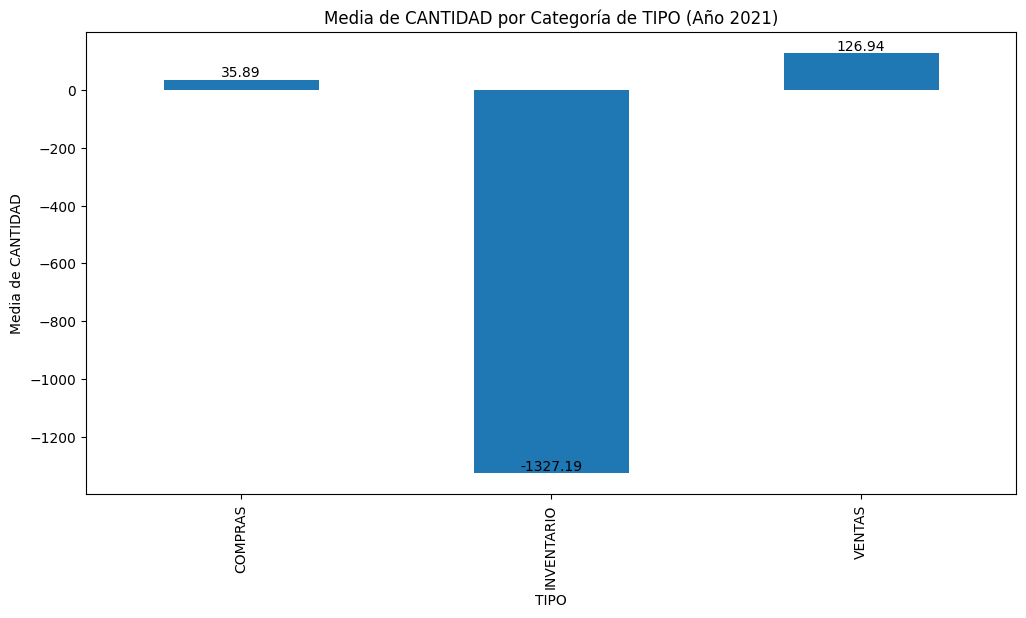

In [69]:
# Filter data for the year 2021
datos_2021 = Operación_df[Operación_df['AÑO'] == 2021]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2021.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2021)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

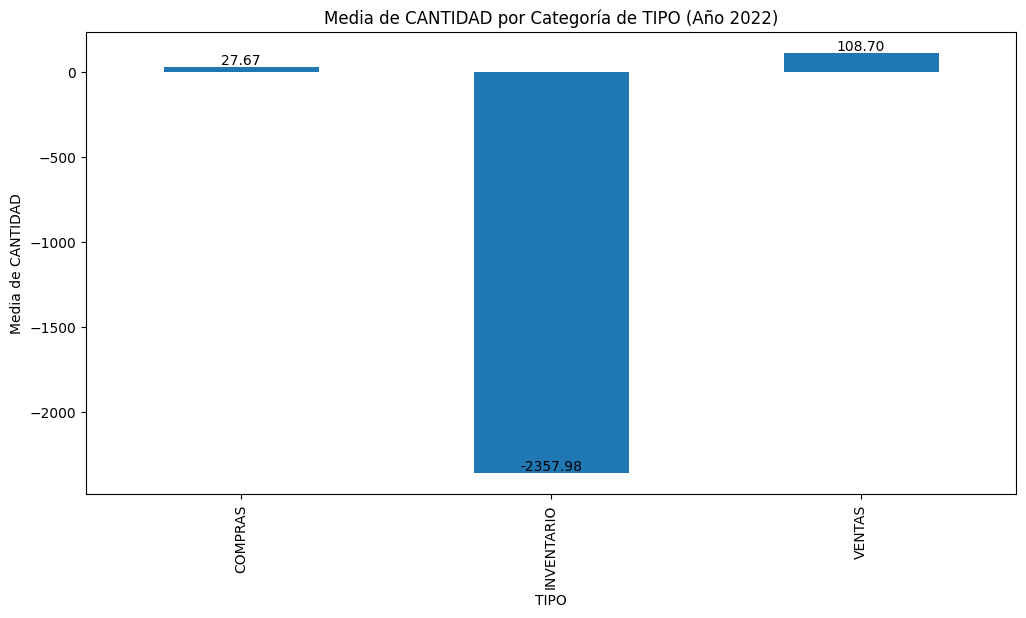

In [71]:
# Filter data for the year 2022
datos_2022 = Operación_df[Operación_df['AÑO'] == 2022]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2022.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2022)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

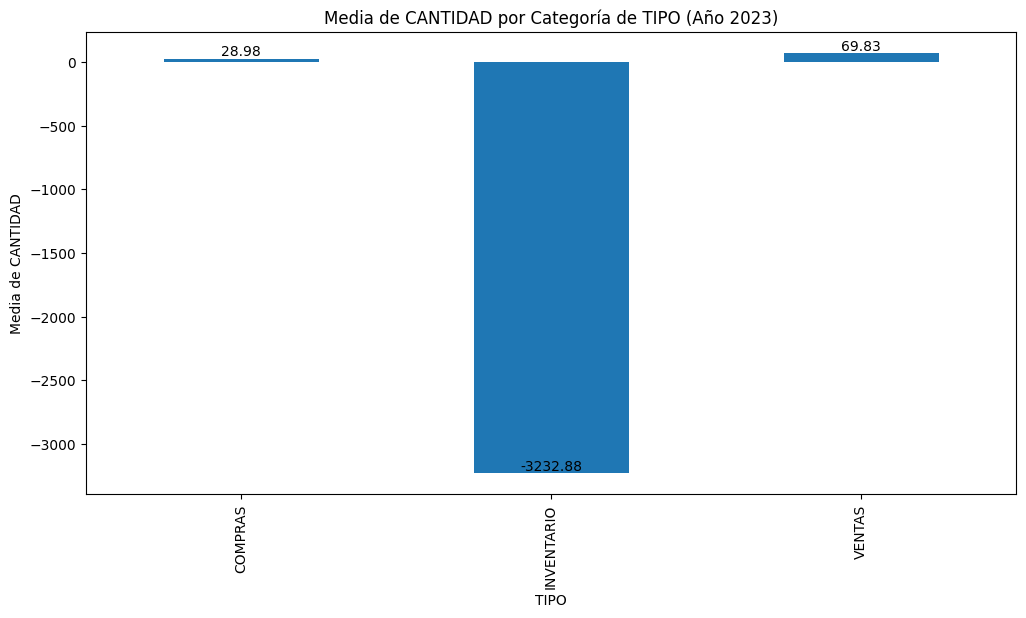

In [72]:
# Filter data for the year 2023
datos_2023 = Operación_df[Operación_df['AÑO'] == 2023]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2023.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2023)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

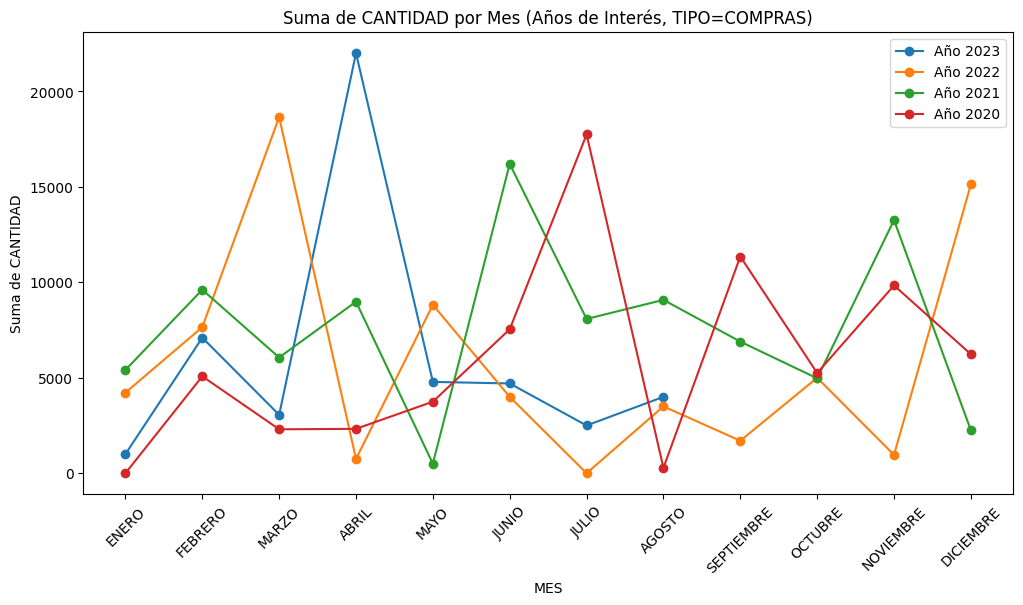

In [73]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "COMPRAS".
plt.figure(figsize=(12, 6))
for año in años_interés:
    compras_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'COMPRAS')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = compras_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=COMPRAS)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

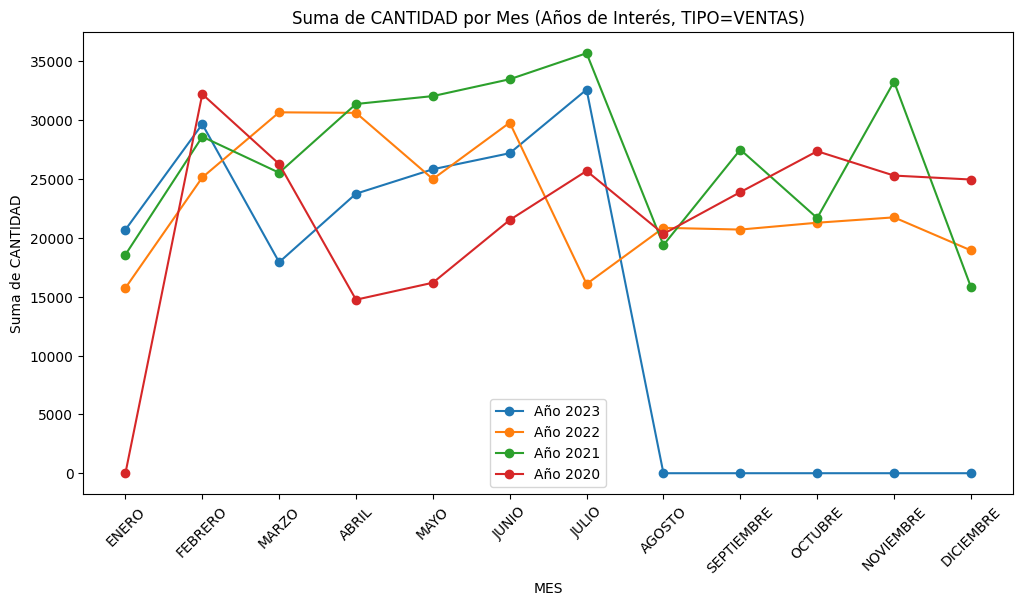

In [74]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "VENTAS".
plt.figure(figsize=(12, 6))
for año in años_interés:
    ventas_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'VENTAS')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = ventas_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=VENTAS)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

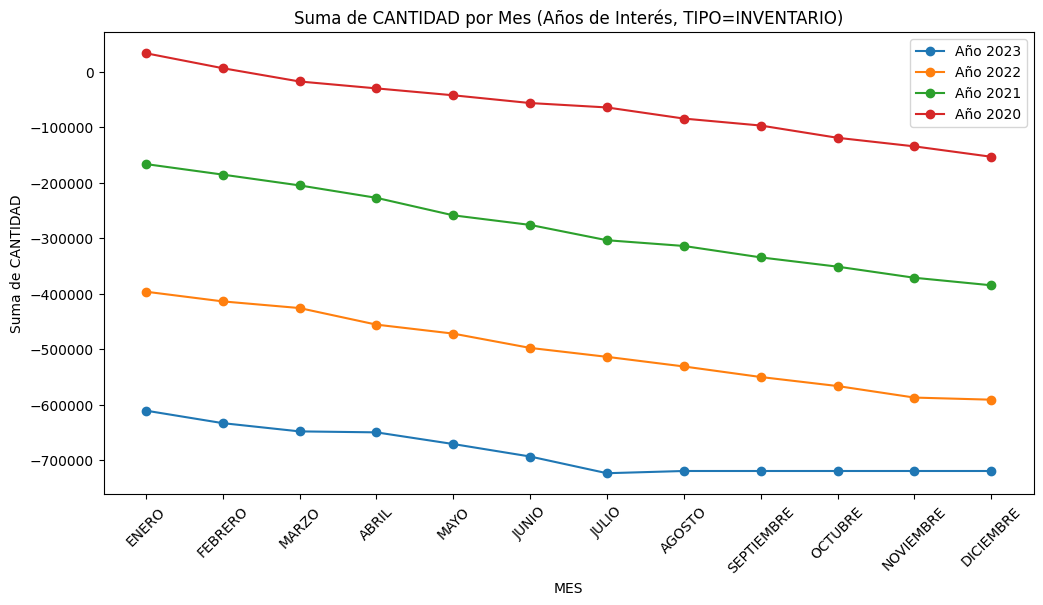

In [75]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "INVENTARIO".
plt.figure(figsize=(12, 6))
for año in años_interés:
    inventario_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'INVENTARIO')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = inventario_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=INVENTARIO)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

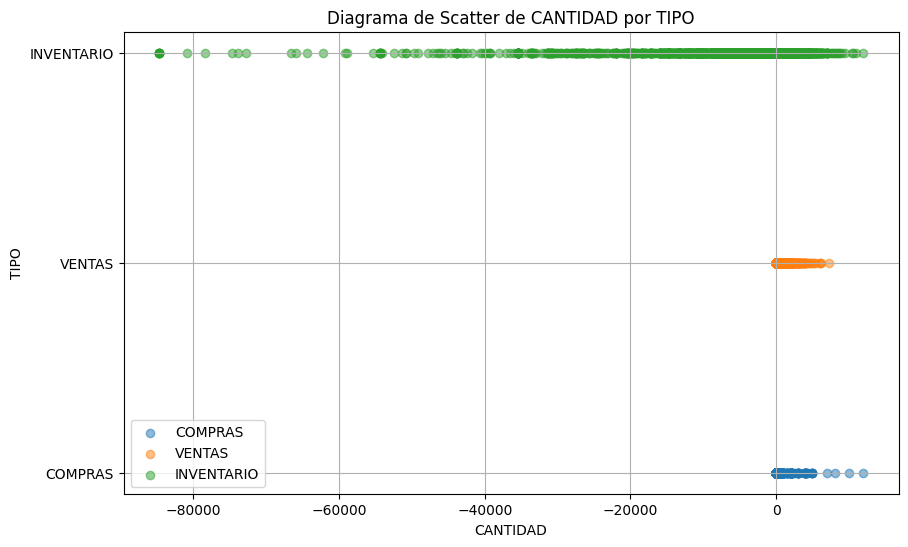

In [76]:
# Filter the data for each TIPO
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']
inventario_df = Operación_df[Operación_df['TIPO'] == 'INVENTARIO']

# Create a scatter plot for each TIPO
plt.figure(figsize=(10, 6))

plt.scatter(compras_df['CANTIDAD'], compras_df['TIPO'], label='COMPRAS', alpha=0.5)
plt.scatter(ventas_df['CANTIDAD'], ventas_df['TIPO'], label='VENTAS', alpha=0.5)
plt.scatter(inventario_df['CANTIDAD'], inventario_df['TIPO'], label='INVENTARIO', alpha=0.5)

plt.title('Diagrama de Scatter de CANTIDAD por TIPO')
plt.xlabel('CANTIDAD')
plt.ylabel('TIPO')
plt.legend()
plt.grid(True)

plt.show()

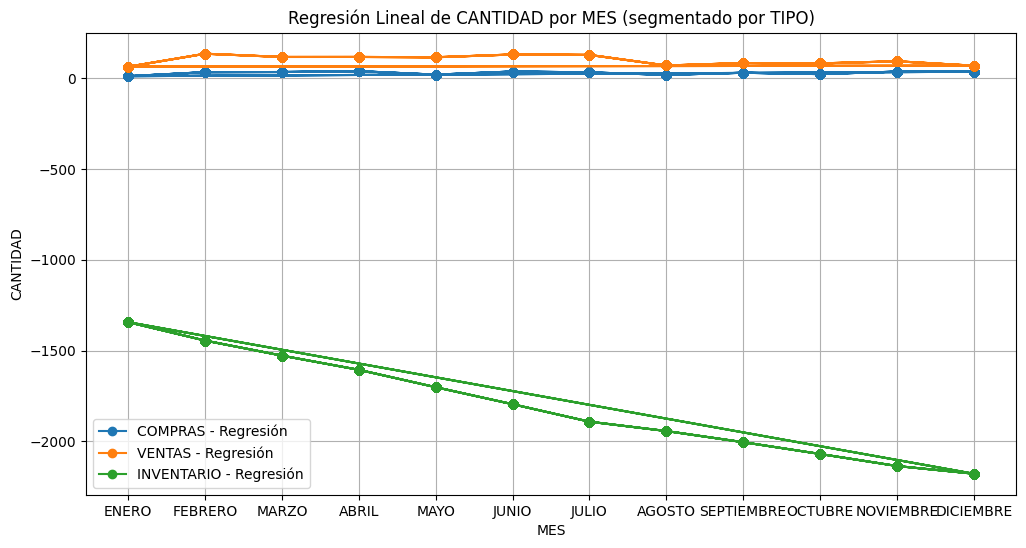

In [79]:
# Filter the data to include only COMPRAS, VENTAS and INVENTARIO records.
tipos = ['COMPRAS', 'VENTAS', 'INVENTARIO']
dataframes = {tipo: Operación_df[Operación_df['TIPO'] == tipo] for tipo in tipos}

# Creates a linear regression model for each TIPO
modelos = {}
for tipo, df in dataframes.items():
    X = pd.get_dummies(df['MES'], drop_first=True)  # Encodes the month as binary variables
    y = df['CANTIDAD']

    modelo = LinearRegression()
    modelo.fit(X, y)
    modelos[tipo] = modelo

# Plots linear regressions
plt.figure(figsize=(12, 6))
for tipo, modelo in modelos.items():
    X_pred = pd.get_dummies(df['MES'], drop_first=True)  # Encodes the month as binary variables
    y_pred = modelo.predict(X_pred)

    plt.plot(df['MES'], y_pred, label=f'{tipo} - Regresión', marker='o')

plt.title('Regresión Lineal de CANTIDAD por MES (segmentado por TIPO)')
plt.xlabel('MES')
plt.ylabel('CANTIDAD')
plt.legend()
plt.grid(True)

plt.show()

<ipython-input-82-b840a93ca00f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Operación_df.corr()


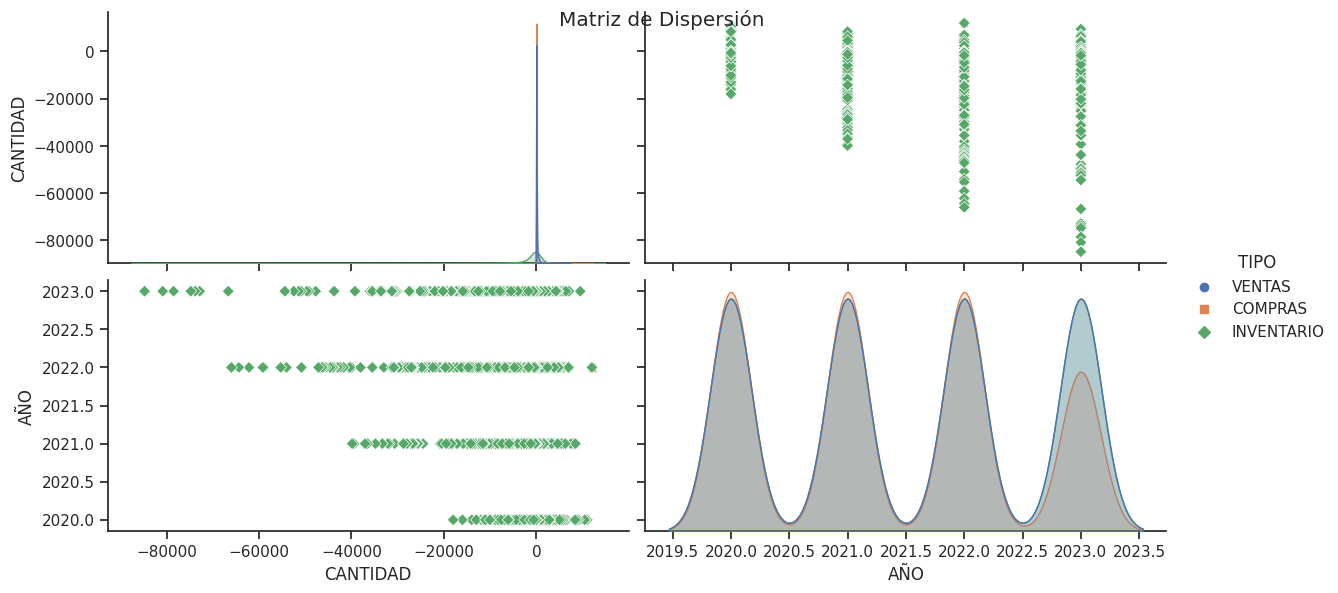

In [82]:
# Correlation matrix
correlation_matrix = Operación_df.corr()

# Scatter matrix (scatter matrix)
sns.set(style="ticks")
sns.pairplot(Operación_df, hue="TIPO", markers=["o", "s", "D"], diag_kind="kde", height=3, aspect=2)
plt.suptitle("Matriz de Dispersión")
plt.show()
